# Lab 4: Functions, Control, Randomization and Probability

Welcome to lab 4! This week, we'll learn about functions and the table method `apply`. We'll also learn about conditionals and iteration, and introduce the concept of randomness. 

First, set up the tests and imports by running the cell below.

In [ ]:
import numpy as np
import pandas as pd

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## 1. Functions and CEO Incomes

Let's start with a real data analysis task.  We'll look at the 2015 compensation of CEOs at the 100 largest companies in California.  The data were compiled for a Los Angeles Times analysis [here](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the SEC from all publicly-traded companies.  Two companies have two CEOs, so there are 102 CEOs in the dataset.

We've copied the data in raw form from the LA Times page into a file called `raw_compensation.csv`.  (The page notes that all dollar amounts are in millions of dollars.)

In [ ]:
raw_compensation = pd.read_csv('raw_compensation.csv')
raw_compensation

**Question 1.** We want to compute the average of the CEOs' pay. Try running the cell below.

In [ ]:
raw_compensation["Total Pay"].mean()

You should see an error. Let's examine why this error occured by looking at the values in the "Total Pay" column. Use the `type` function and set `total_pay_type` to the type of the first value in the "Total Pay" column.

In [14]:
total_pay_type = ...
total_pay_type

Ellipsis

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
The type is `str` and the code is `type(raw_compensation.["Total Pay"].iloc(0))` 
</p>
</details>

**Question 2.** You should have found that the values in "Total Pay" column are strings (text). It doesn't make sense to take the average of the text values, so we need to convert them to numbers if we want to do this. Extract the first value in the "Total Pay" column.  It's Mark Hurd's pay in 2015, in *millions* of dollars.  Call it `mark_hurd_pay_string`.

In [ ]:
mark_hurd_pay_string = ...
mark_hurd_pay_string

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
The value is `$53.24` and the code is `raw_compensation["Total Pay"].iloc[0]` 
</p>
</details>

**Question 3.** Convert `mark_hurd_pay_string` to a number of *dollars*.  The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  You'll also need the function `float`, which converts a string that looks like a number to an actual number.  Last, remember that the answer should be in dollars, not millions of dollars.

In [ ]:
mark_hurd_pay = ...
mark_hurd_pay

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
The answer is `53250000` dollars and the code is `float(mark_hurd_pay_string.strip("$"))*1e6`
</p>
</details>

To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "total pay" strings to numeric values.  Later in this lab we'll see the payoff: we can call that function on every pay string in the dataset at once.

**Question 4.** Copy the expression you used to compute `mark_hurd_pay` as the `return` expression of the function below, but replace the specific `mark_hurd_pay_string` with the generic `pay_string` name specified in the first line of the `def` statement.

In [ ]:
def convert_pay_string_to_number(pay_string):
    """Converts a pay string like '$100' (in millions) to a number of dollars."""
    return ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
The code is `float(pay_string.strip('$'))*10**6`
</p>
</details>

Running that cell doesn't convert any particular pay string. Instead, it creates a function called `convert_pay_string_to_number` that can convert any string with the right format to a number representing millions of dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument, a string, and it returns a number.

In [ ]:
convert_pay_string_to_number('$42')

In [ ]:
convert_pay_string_to_number(mark_hurd_pay_string)

In [ ]:
# We can also compute Safra Catz's pay in the same way:
safra_catz_pay_string = raw_compensation.loc[raw_compensation["Name"].str.contains("Safra")]["Total Pay"].iloc[0]
convert_pay_string_to_number(safra_catz_pay_string)

What have we gained?  Well, without the function, we'd have to copy that `10**6 * float(pay_string.strip("$"))` stuff each time we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

Soon, we'll see how to apply this function to every pay string in a single expression. First, let's write some more functions.

## 2. Defining functions

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50.  (No percent sign.)

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Let's call our function `to_percentage`.
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  `to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)

We put a colon after the signature to tell Python it's over.

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else.  First let's give a name to the number we multiply a proportion by to get a percentage.

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor

**Question 1.** Define `to_percentage` in the cell below.  Call your function to convert the proportion .2 to a percentage.  Name that percentage `twenty_percent`.

In [ ]:
def ...
    """ ... """
    ... = ...
    return ...

twenty_percent = ...
twenty_percent

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
We call the function specified in the instructions using the following:
`twenty_percent = to_percentage(.2)`</p>
</details>

Like the built-in functions, you can use named values as arguments to your function.

**Question 2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Just like other named things, functions stick around after you define them.

In [ ]:
a_proportion = 2**(.5) / 2
a_percentage = ...
a_percentage

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
The code is `to_percentage(a_proportion)`
</p>
</details>

Here's something important about functions: the names assigned within a function body are only accessible within the function body. Once the function has returned, those names are gone.  So even though you defined `factor = 100` inside `to_percentage` above and then called `to_percentage`, you cannot refer to `factor` anywhere except inside the body of `to_percentage`:

In [ ]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.)
factor

As we've seen with the built-in functions, functions can also take strings (or arrays, or tables) as arguments, and they can return those things, too.

**Question 3.** Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".)

*Hint:* To remove all the "a"s from a string, you can use `that_string.replace("a", "")`.  And you can call `replace` multiple times.

In [ ]:
def disemvowel(a_string):
    ...
    ...

# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
Should be `'Cn y rd ths wtht vwls?'` and code is `a_string.replace('a','').replace('e','').replace(continue for all vowels)`
</p>
</details>

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake telling you to follow another recipe to make the frosting, and another to make the sprinkles.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  The number should be the number of characters in the argument string that aren't vowels.

*Hint:* The function `len` takes a string as its argument and returns the number of characters in it.

In [ ]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
The code is `len(disemvowel(a_string))`
</p>
</details>

Functions can also encapsulate code that *does things* rather than just computing values.  For example, if you call `print` inside a function, and then call that function, something will get printed.

The `movies_by_year` dataset in the textbook has information about movie sales in recent years.  Suppose you'd like to display the year with the 5th-highest total gross movie sales, printed in a human-readable way.  You might do this:

In [ ]:
movies_by_year = pd.read_csv("movies_by_year.csv")
rank = 5
fifth_from_top_movie_year = movies_by_year.sort_values("Total Gross", ascending=False)["Year"].iloc[rank-1]
print("Year number", rank, "for total gross movie sales was:", fifth_from_top_movie_year)

After writing this, you realize you also wanted to print out the 2nd and 3rd-highest years.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 5.** Write a function called `print_kth_top_movie_year`.  It should take a single argument, the rank of the year (like 2, 3, or 5 in the above examples).  It should print out a message like the one above.  It shouldn't have a `return` statement.

In [ ]:
def print_kth_top_movie_year(k):
    # Our solution used 2 lines.
    ...
    ...

# Example calls to your function:
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
`k` is just `rank` from the previous code; rename things accordingly and include in your function
</p>
</details>

**Question 6.** Create a bar plot showing the `Total Gross` sales per year from the `movies_by_year` table. Why do we want a bar plot instead of a histogram?

In [ ]:
...

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
`movies_by_year[['Total Gross', 'Year']].plot.bar('Year')`
bar plot because the data are already grouped by year
</p>
</details>

## 3. `apply`ing functions

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "the"!

For example, we can make a new name for the built-in function `max` if we want:

In [ ]:
our_name_for_max = max
our_name_for_max(2, 6)

The old name for `max` is still around:

In [ ]:
max(2, 6)

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [ ]:
max

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an list of functions.

In [ ]:
[max, np.average, min]

**Question 1.** Make an list containing any 3 other functions you've seen.  Call it `some_functions`.

In [ ]:
some_functions = ...
some_functions

Working with functions as values can lead to some funny-looking code.  For example, see if you can figure out why this works:

In [ ]:
[max, np.average, min][0](4, -2, 7)

Here's a simpler example that's actually useful: the table method `apply`.

`apply` calls a function many times, once on *each* element in a column of a table.  It produces an array of the results.  Here we use `apply` to convert every CEO's pay to a number, using the function you defined:

In [ ]:
raw_compensation['Total Pay'].apply(convert_pay_string_to_number)

Here's an illustration of what that did:

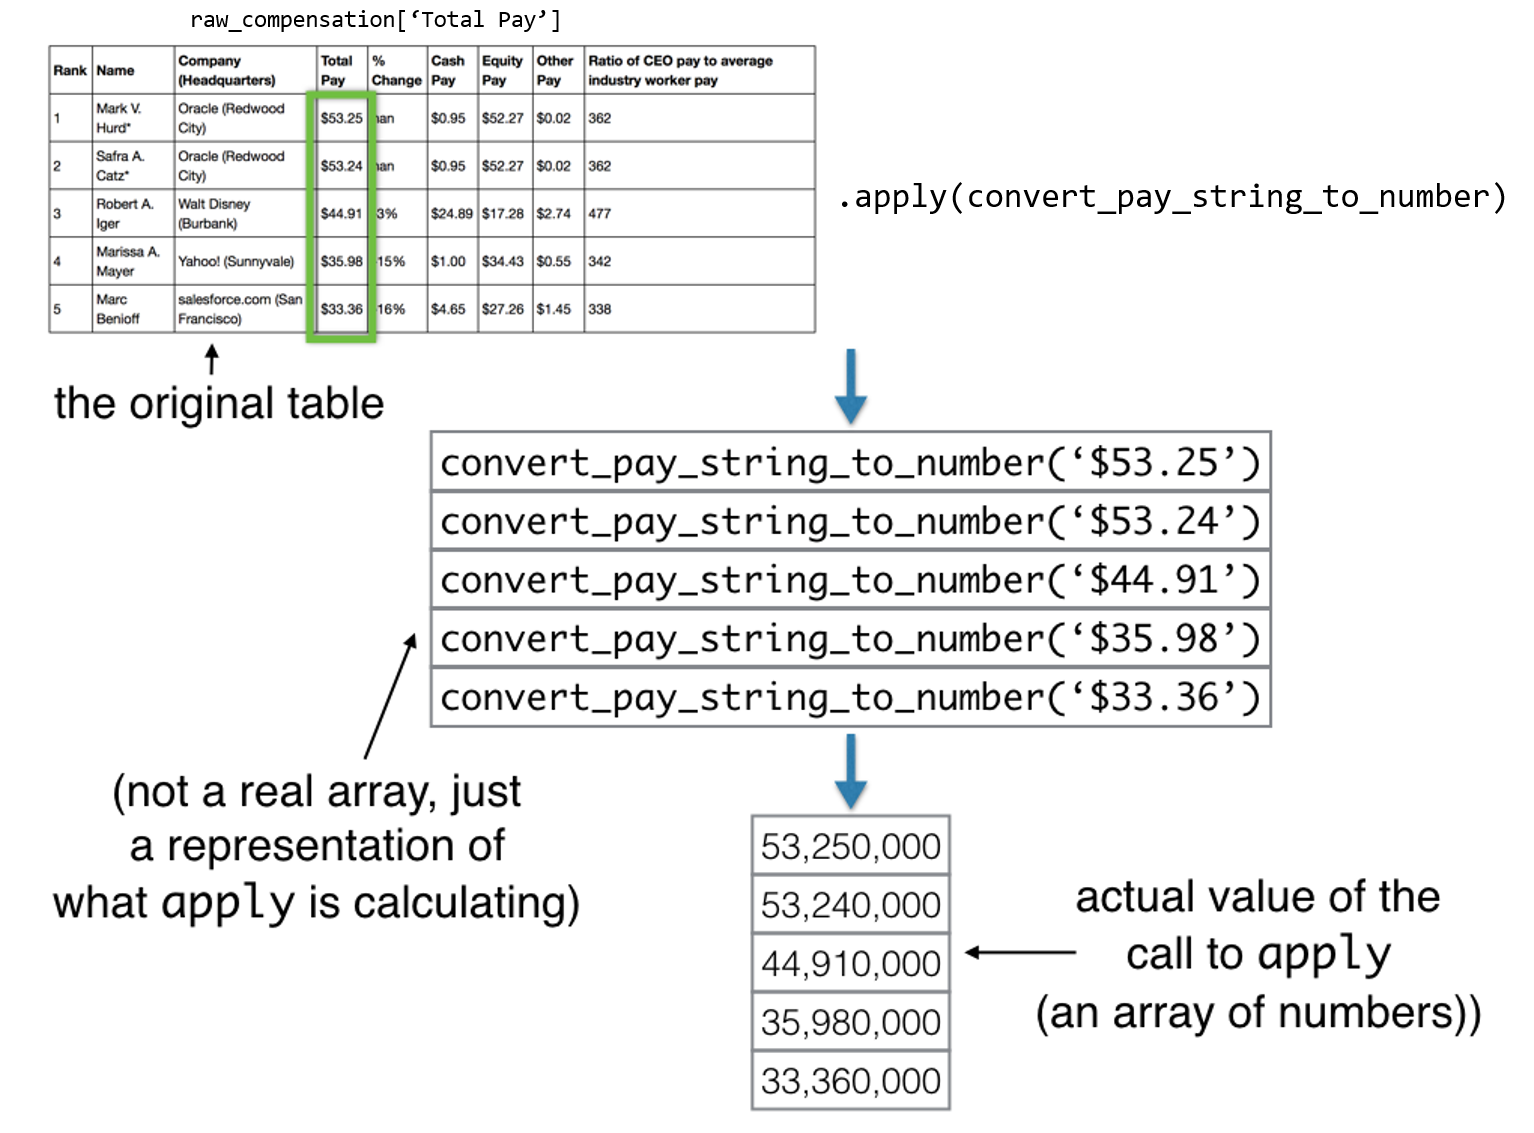


Note that we didn't write something like `convert_pay_string_to_number()` or `convert_pay_string_to_number("Total Pay")`.  The job of `apply` is to call the function we give it, so instead of calling `convert_pay_string_to_number` ourselves, we just write its name as an argument to `apply`.

**Question 2.** Using `apply`, make a table that's a copy of `raw_compensation` with one more column called "Total Pay (\$)".  It should be the result of applying `convert_pay_string_to_number` to the "Total Pay" column, as we did above.  Call the new table `compensation`.

In [ ]:
compensation = raw_compensation.copy()
compensation['Total Pay ($)'] = ...
compensation

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
code is `compensation['Total Pay'].apply(convert_pay_string_to_number)`</p>
</details>

Now that we have the pay in numbers, we can compute things about them.

**Question 3.** Compute the average total pay of the CEOs in the dataset.

In [ ]:
average_total_pay = ...
average_total_pay

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
average_total_pay = compensation['Total Pay ($)'].mean()
average total pay is 11445294.18
</p>
</details>

**Question 4.** Companies pay executives in a variety of ways: directly in cash; by granting stock or other "equity" in the company; or with ancillary benefits (like private jets).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be an array of numbers, one for each CEO in the dataset.)

In [ ]:
cash_proportion = ...
cash_proportion

<details><summary><button>Click here to reveal the answer!</button></summary>
<p>
code is `compensation["Cash Pay"].apply(convert_pay_string_to_number)/compensation["Total Pay ($)"]`
</p>
</details>

## 4. Nachos and Conditionals

In Python, Boolean values can either be `True` or `False`. We get Boolean values when using comparison operators, among which are `<` (less than), `>` (greater than), and `==` (equal to). For a complete list, refer to [Python Operators](https://www.w3schools.com/python/python_operators.asp).

Run the cell below to see an example of a comparison operator in action.

In [ ]:
3 > 1 + 1

We can even assign the result of a comparison operation to a variable.

In [ ]:
result = 10 / 2 == 5
result

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [ ]:
np.array([1, 5, 7, 8, 3, -1]) > 3

Waiting on the dining table just for you is a hot bowl of nachos! Let's say that whenever you take a nacho, it will have cheese, salsa, both, or neither (just a plain tortilla chip). 

Using the function call `np.random.choice(array_name)`, let's simulate taking nachos from the bowl at random. Start by running the cell below several times, and observe how the results change.

In [ ]:
nachos = np.array(['cheese', 'salsa', 'both', 'neither'])
np.random.choice(nachos)

**Question 1.** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos`. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator and the `np.count_nonzero` method.

In [ ]:
ten_nachos = np.array(['neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both'])
number_cheese = ...
number_cheese

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
number_cheese = np.count_nonzero(ten_nachos == 'cheese')
</pre>
</details>


**Conditional Statements**

A conditional statement is made up of many lines that allow Python to choose from different alternatives based on whether some condition is true.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
```

How the function works is if the input `x` is greater than `0`, we get the string `'Positive'` back.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only one of the bodies will ever be executed. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. As soon as a true value is found, the corresponding body is executed, and the rest of the expression is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. For more examples and explanation, refer to [Section 8.1](https://www.inferentialthinking.com/chapters/08/1/conditional-statements.html).

**Question 2.** Complete the following conditional statement so that the string `'More please'` is assigned to `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`.

In [ ]:
say_please = '?'

if ...
    say_please = 'More please'
    
say_please

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
if number_cheese &lt; 5:
    say_please = 'More please'
</pre>
</details>



**Question 3.** Write a function called `nacho_reaction` that returns a string based on the type of nacho passed in. From top to bottom, the conditions should correspond to: `'cheese'`, `'salsa'`, `'both'`, `'neither'`.  

In [ ]:
def nacho_reaction(nacho):
    if ...:
        return 'Cheesy!'
    # next condition should return 'Spicy!'
    ...
    # next condition should return 'Wow!'
    ...
    # next condition should return 'Meh.'
    ...

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
if nacho == 'cheese':
        return 'Cheesy!'
# next condition should return 'Spicy!'
if nacho == 'salsa':
    return 'Spicy!'
# next condition should return 'Wow!'
if nacho == 'both':
    return 'Wow!'
# next condition should return 'Meh.'
else:
    return 'Meh.'
</pre>
</details>



        
      

**Question 4.** Add a column `'Reactions'` to the table `ten_nachos_reactions` that consists of reactions for each of the nachos in `ten_nachos`. 

*Hint:* Use the `apply` method. 

In [ ]:
ten_nachos_reactions = pd.DataFrame({'Nachos': ten_nachos})
...
ten_nachos_reactions

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
ten_nachos_reactions['Reactions'] = ten_nachos_reactions['Nachos'].apply(nacho_reaction)
</pre>
</details>




**Question 5.** Using code, find the number of `'Wow!'` reactions for the nachos in `ten_nachos_reactions`.

In [ ]:
number_wow_reactions = ...
number_wow_reactions

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
len(ten_nachos_reactions.loc[ten_nachos_reactions['Reactions'] == 'Wow!'].index)
</pre>
</details>


**Question 6:** Change just the comparison operators from `==` to some other operators so that `should_be_true` is `True`.

In [ ]:
should_be_true = number_cheese == number_wow_reactions == np.count_nonzero(ten_nachos == 'neither')
should_be_true

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
number_cheese &lt; number_wow_reactions &gt; np.count_nonzero(ten_nachos == 'neither')

</pre>
</details>

**Question 7.** Complete the function `both_or_neither`, which takes in a table of nachos with reactions (just like the one from Question 4) and returns `'Wow!'` if there are more nachos with both cheese and salsa, or `'Meh.'` if there are more nachos with neither. If there are an equal number of each, return `'Okay!'`.

In [ ]:
def both_or_neither(nacho_table):
    reactions = ...
    number_wow_reactions = ...
    number_meh_reactions = ...
    if ...:
        return 'Wow!'
    # next condition should return 'Meh.'
    ...
    # next condition should return 'Okay!'
    ...

many_nachos = pd.DataFrame({'Nachos' : np.random.choice(nachos, 250)})
many_nachos['Reactions'] = many_nachos['Nachos'].apply(nacho_reaction)
result = both_or_neither(many_nachos)
result

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
def both_or_neither(nacho_table):
    reactions = nacho_table['Reactions']
    number_wow_reactions = np.count_nonzero(reactions == 'Wow!')
    number_meh_reactions = np.count_nonzero(reactions == 'Meh.')
    if number_wow_reactions > number_meh_reactions:
        return 'Wow!'
    # next condition should return 'Meh.'
    elif number_wow_reactions &lt; number_meh_reactions:
        return 'Meh.'
    # next condition should return 'Okay!'
    else:
        return 'Okay!'
</pre>
</details>



## 5. Iteration
Using a `for` statement, we can perform a task multiple times. This is known as iteration. Here, we'll simulate drawing different suits from a deck of cards. 

In [ ]:
suits = np.array(["♤", "♡", "♢", "♧"])

draws = np.array([])

repetitions = 6

for i in np.arange(repetitions):
    draws = np.append(draws, np.random.choice(suits))

draws

In the example above, the `for` loop appends a random draw to the `draws` array for every number in `np.arange(repetitions)`. Another use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [ ]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color)

We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. Note that the name `color` is arbitrary; we could easily have named it something else.

**Question 1.** Clay is playing darts. His dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates his total score after 1000 dart tosses. Make sure to use a `for` loop.

In [ ]:
possible_point_values = ...
tosses = 1000
total_score = ...

total_score

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
total_score = 0
for i in np.arange(tosses):
    total_score += np.random.choice(possible_point_values)</pre>
</details>

**Question 2.** What is the average point value of a dart thrown by Clay?

In [ ]:
average_score = ...
average_score

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
average_score = sum(np.random.choice(possible_point_values, 1000))/1000
</pre>
</details>

**Question 3.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

In [ ]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = ...
        
longer_than_five

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
longer_than_five = 0

for word in p_and_p_words:
    if len(word) > 5:
        longer_than_five = longer_than_five + 1
</pre>
</details>

**Question 4.** Using simulation with 10,000 trials, assign `chance_of_all_different` to an estimate of the chance that if you pick three words from Pride and Prejudice uniformly at random (with replacement), they all have different lengths. 

*Hint*: Remember that `!=` only checks for non-equality between two items, not three. However, you can use `!=` more than once in the same line. 

For example, `2 != 3 != 4` first checks for non-equality between `2` and `3`, then `3` and `4`, but NOT `2` and `4`.

In [ ]:
trials = 10000
different = ...

for ... in ...:
    ...

chance_of_all_different = ...

chance_of_all_different

<details><summary><button>Click here to reveal the answer!</button></summary>
One way to solve this would be:
<pre>
different = 0

for i in range(trials):
    words = np.random.choice(p_and_p_words, 3)
    if len(words[0]) != len(words[1]) != len(words[2]):
        if len(words[0]) != len(words[2]):
            different = different + 1

chance_of_all_different = different / trials
</pre>
</details>



## 6. Finding Probabilities
After a long day of class, Clay decides to go to Bartlett for dinner. Today's menu has Clay's four favorite foods: quesadillas, hamburgers, pizza, and pasta. However, each dish has a 30% chance of running out before Clay can get to Bartlett. Of course, assume that Clay is on campus and that Bartlett is open to serve dinner (i.e. the Probability is not 0, inspite of the current pandemic!)

**Question 1.** What is the probability that Clay will be able to eat pizza at Bartlett?

In [ ]:
pizza_prob = ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
0.7
</pre>
</details>

**Question 2.** What is the probability that Clay will be able to eat all four of these foods at Bartlett?

In [ ]:
all_prob = ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
0.7 ** 4 = 0.2401
</pre>
</details>

**Question 3.** What is the probability that Bartlett will have run out of something before Clay can get there?

In [ ]:
something_is_out = ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>1 - 0.7 ** 4</pre>
</details>

To make up for their unpredictable food supply, Bartlett decides to hold a contest for some free UChicago Dining swag. There is a bag with two red marbles, two green marbles, and two blue marbles. Clay has to draw three marbles separately. In order to win, all three of these marbles must be of different colors.

**Question 4.** What is the probability of Clay winning the contest?

In [ ]:
winning_prob = 

<details><summary><button>Click here to reveal the answer!</button></summary>
The answer is (6/6)*(4/5)*(2/4) = 0.4
</details>

Great job! :D You're finished with lab 4!

**Acknowledgement**: The materials for this lab, and course textbook are based on the [data8](http://data8.org/) course at UC Berkeley.